In [46]:
from sklearn import datasets
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

%matplotlib inline

Regression

In [7]:
boston = datasets.load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
print(boston.DESCR[:1200])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


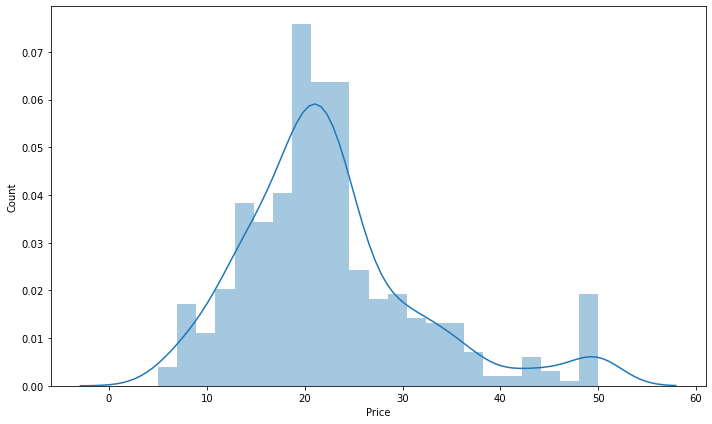

In [29]:
plt.figure(figsize = (10, 6))

sns.distplot(boston.target)

plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()

In [32]:
lin_reg = LinearRegression()

model = lin_reg.fit(boston.data, boston.target)

In [33]:
weights = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))

weights

,0,1
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [35]:
first_pred = sum(map(lambda x: x[0]*x[1], zip(model.coef_, boston.data[0])))
first_pred += model.intercept_

first_pred

30.003843377016747

In [37]:
first_pred = model.predict(boston.data)
                          
first_pred[:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

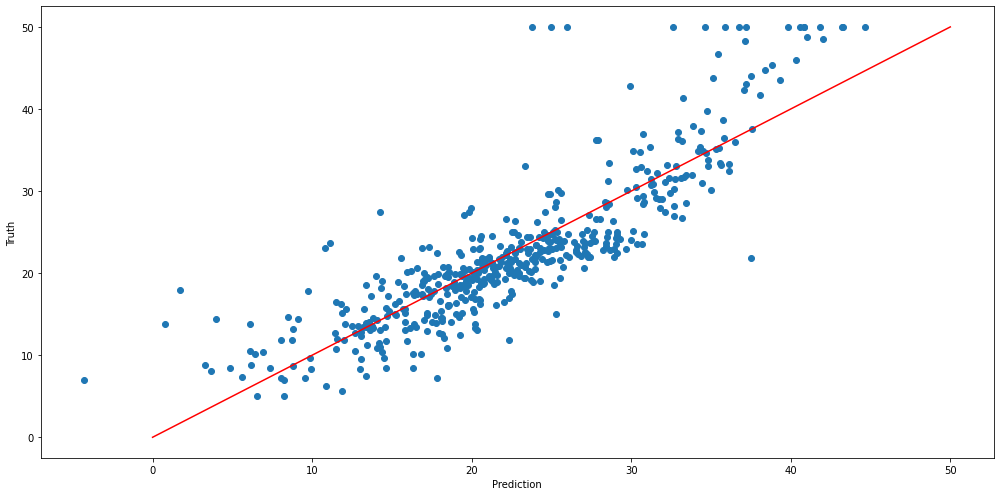

In [43]:
plt.figure(figsize=(14, 7))

plt.scatter(first_pred, boston.target)

plt.plot([0, 50], [0, 50], color = "red")

plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.tight_layout()

Classification

In [45]:
cancer = datasets.load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

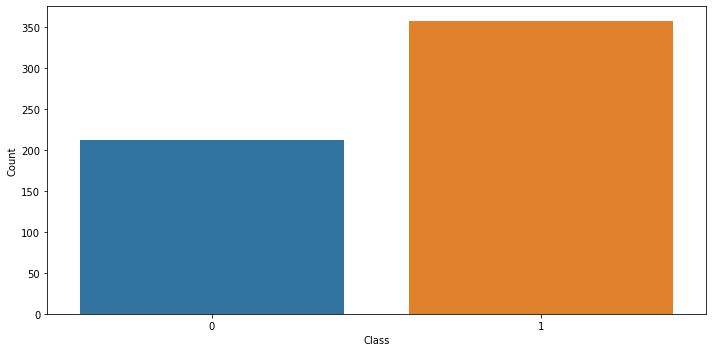

In [48]:
plt.figure(figsize=(10, 5))

sns.countplot(cancer.target)

plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()

In [49]:
model = LogisticRegression().fit(cancer.data, cancer.target)

model.coef_

/home/max/anaconda3/envs/coutsera_ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 0.95040524,  0.45875761,  0.28011275, -0.01598736, -0.03534126,
        -0.1665238 , -0.23315972, -0.09819754, -0.0489514 , -0.00976411,
         0.04125304,  0.37494728,  0.14546236, -0.11106645, -0.00319776,
        -0.03580697, -0.04986707, -0.01278844, -0.01181869, -0.00332508,
         1.01041331, -0.50677764, -0.2489932 , -0.01403308, -0.06412163,
        -0.51933044, -0.64632819, -0.18894642, -0.15521899, -0.04989823]])

In [50]:
prediction = model.predict(cancer.data)

prediction[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [51]:
pred_p = model.predict_proba(cancer.data)

pred_p[:10]

array([[1.00000000e+00, 2.81569333e-15],
       [9.99999976e-01, 2.43903210e-08],
       [9.99999802e-01, 1.97550676e-07],
       [1.52684632e-01, 8.47315368e-01],
       [9.99996042e-01, 3.95803701e-06],
       [7.34424916e-01, 2.65575084e-01],
       [9.99998962e-01, 1.03789425e-06],
       [9.69263613e-01, 3.07363870e-02],
       [6.93669637e-01, 3.06330363e-01],
       [9.81558990e-01, 1.84410101e-02]])

In [54]:
model.score(cancer.data, cancer.target)

0.9472759226713533